<a href="https://colab.research.google.com/github/Rmohanty385/Health-Insurance-Cross-sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Health-Insurance-Cross-sell-Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

*   An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. 
*   There are multiple factors that play a major role in capturing customers for any insurance policy. Here we have information about demographics such as age, gender, region code, and vehicle damage, vehicle age, annual premium, policy sourcing channel. Based on the previous trend, this data analysis and prediction with machine learning models can help us understand what are the reasons for news popularity on social media and obtain the best classification model.

*   We have a dataset which contains information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc. related to a person who is interested in vehicle insurance. We have 381109 data points available.

*   Predicting whether a customer would be interested in buying Vehicle Insurance so that the company can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# **GitHub Link -**

https://github.com/Rmohanty385/Health-Insurance-Cross-sell-Prediction

# **Problem Statement**


Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

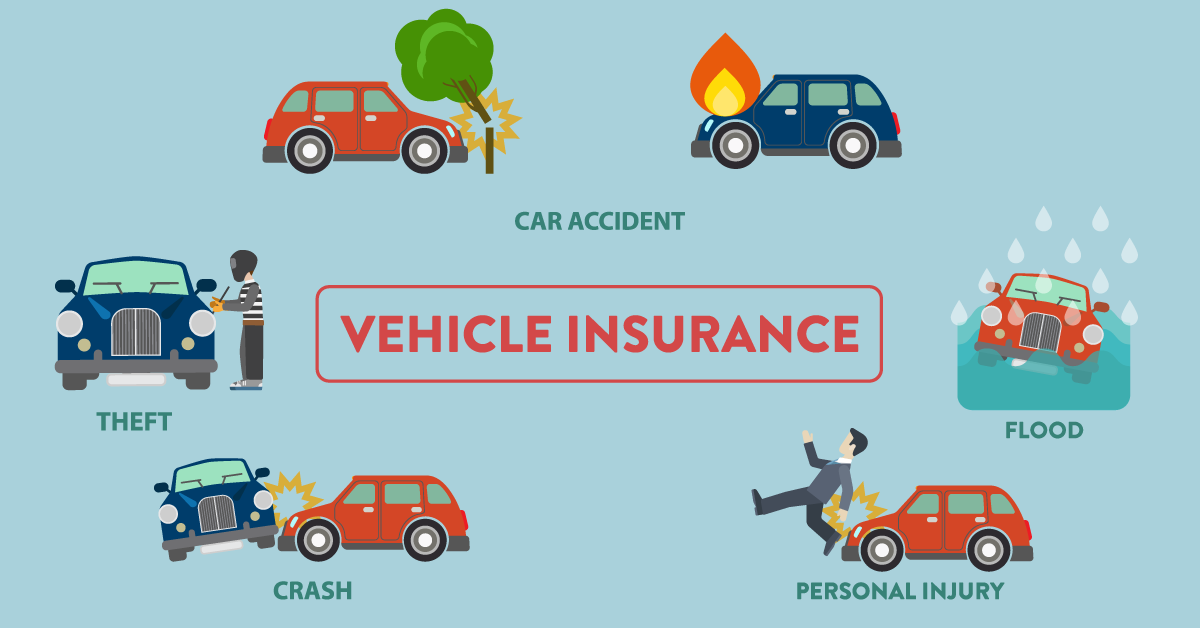

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings;warnings.simplefilter('ignore')
import time

# Used in Hypothesis Testing
from scipy.stats import *
import math

# Used in data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Used in Feature Engineering
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesClassifier

# Used in Data Scaling
from sklearn.preprocessing import StandardScaler

# Used in Splitting data
from sklearn.model_selection import train_test_split

# Used in Oversampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Used in ML Model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
import lightgbm as lgb

# Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn import metrics

# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows=df.shape[0]
columns=df.shape[1]
print(f"The no of rows is {rows} and no of columns is {columns}")

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'The number of duplicate rows are {df.duplicated().sum()}')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=17)
plt.show()

### What did you know about your dataset?



*   The dataset given is a dataset from Health Insurance industry, and we have to analysis the response of customers and the insights behind it.

*   Sell prediction is analytical studies on the possibility of a customer abandoning service. The goal is to understand and take steps to change it before the costumer gives up the service.

*   The above dataset has 381109 rows and 12 columns. There are no mising values and duplicate values in the dataset.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description 



*   **id** : Unique ID for the customer

*   **Gender** : Gender of the customer

*   **Age** : Age of the customer

*   **Driving_License - 0** : Customer does not have DL, **1** : Customer already has DL

*   **Region_Code** : Unique code for the region of the customer

*   **Previously_Insured - 1** : Customer already has Vehicle Insurance, **0** : Customer doesn't have Vehicle Insurance

*   **Vehicle_Age** : Age of the Vehicle

*   **Vehicle_Damage - 1**: Customer got his/her vehicle damaged in the past. **0** : Customer didn't get his/her vehicle damaged in the past.

*   **Annual_Premium**: The amount customer needs to pay as premium in the year

*  **PolicySalesChannel**: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

*   **Vintage** : Number of Days, Customer has been associated with the company

*   **Response - 1** : Customer is interested, **0** : Customer is not interested



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Assingning numericals column of df to variable numerical_cols
numerical_cols = list(df.describe())
numerical_df = df[numerical_cols]
numerical_df.head()

In [ ]:
# Assingning catagoricals column of df to variable catagorical_cols
categorical_cols=list(set(df.columns)-set(numerical_cols))
categorical_df=df[categorical_cols]
categorical_df.head()

In [ ]:
#let's check in each column of categorical_df how namy unique values are present
for column_name in categorical_cols:
  print('-'*35)
  print(df[column_name].value_counts(),'\n')
  print('-'*35)

In [ ]:
df.describe(include='O')

### What all manipulations have you done and insights you found?

In this dataset nothing to do in wrangling .so i just divided the df in two dfs numerical_df and categorical_df . numerical_df for all the numericals column and categorical_df is for all the categorical columns and i check the categorical_df then i found there is 3 columns gender, vehicle_age and vehicle_damage and there are 2 unique in gender, 3 unique in vehicle_age and 2 unique in vehicle_damage.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Countplot on dependent variable i.e Response (Univariate)

In [ ]:
# Chart - 1 visualization code
# Dependent Column Value Counts
print(df.Response.value_counts())
print("\n")
# Dependent Variable Column Visualization
sns.countplot(df.Response)
plt.title('Not-Interested vs Interested Policyholders', fontsize=15)
plt.show()
df.Response.value_counts()/df.shape[0]

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, counts of values for the different levels of a categorical or nominal variable.

*   To show the count of interested and not-interested of policyholders , So i have used Countplot.






##### 2. What is/are the insight(s) found from the chart?

*   The dependant variable has binary values of 0 and 1. We can infer from the plot above that many clients have no interest in purchasing vehicle insurance. 
*   12.22 percent of the data are 1's and 87.78 percent of the data are 0's. This data must be handled using the imbalance technique since the output feature is unbalanced.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.


*   No, the gained insights help a positive business impact.

*   No, there are no such insights that lead to negative growth.






#### Chart - 2 : Piechart on independent variable i.e Gender (Univariate)

In [ ]:
# Chart - 2 visualization code
# Independent Column Value Counts
print(df.Gender.value_counts())
print("\n")
# Independent Variable Column Visualization
df['Gender'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               explode=[0,0]
                              )
plt.title('Distribution of Gender',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. 
*   Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Gender.




##### 2. What is/are the insight(s) found from the chart?

From the above pie chart i found there is 206089 male i.e (54.1 %) and 175020 female i.e (45.9 %). So , we can say that gender variable is almost equally distributed but male are liitle bit more in comparison to female.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   No, the gained insights help a positive business impact.
*   No, there are no such insights that lead to negative growth


#### Chart - 3 : Countplot on independent variable i.e Previously_Insured (Univariate)

In [ ]:
# Chart - 3 visualization code
# Independent Column Value Counts
print(df.Previously_Insured.value_counts())
print('\n')

# Independent Variable Column Visualization
sns.countplot(df.Previously_Insured)
plt.title('Previously_Insured Distribution',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Vehicle Previously Insured. I have used countplot.




##### 2. What is/are the insight(s) found from the chart?

From the above countplot, i found that there ar 206481 those people who not insured previously and 174628 are those people who insured previously, which is almost equally distributed but Previously Insured people are little bit more in comparison to not insured people.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   No, the gained insights didn't create a positive business impact.
*   No, there are no such insights that lead to negative growth.

#### Chart - 4 : Piechart on independent variable i.e Vehicle_Damage (Univariate)

In [ ]:
# Chart - 4 visualization code
# Independent Column Value Counts
print(df.Vehicle_Damage.value_counts())
print('\n')

# Independent Variable Column Visualization
df['Vehicle_Damage'].value_counts().plot(kind='pie',
                                         figsize=(15,6),
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         shadow=True,
                                         explode=(0,0))
plt.title('Vehicle_Damage Distribution',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. 
*   Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the Vehicle Damage.




##### 2. What is/are the insight(s) found from the chart?

From the above pie chart i found there are 192413 i.e (50.5 %) people whose vrhicle is damage and 188696 i.e (49.5 %) are those people whose vehicle is not damage. So , we can say that Vehicle_Damage variable is almost equally distributed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   No, the gained insights didn't create a positive business impact.
*   No, there are no such insights that lead to negative growth.




#### Chart - 5 : Countplot on independent variable i.e Vehicle_Age (Univariate)

In [ ]:
# Chart - 5 visualization code
# Independent Column Value Counts
print(df.Vehicle_Age.value_counts())
print('\n')

# Independent Variable Column Visualization
sns.countplot(df.Vehicle_Age)
plt.title('Vehicle_Age Distribution',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Vehicle age distribution. I have used countplot.



##### 2. What is/are the insight(s) found from the chart?

From the above countplot, we can say that most of the people having those vehicle whose age in range 1-2 years in comparison others two.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   No, the gained insights didn't create a positive business impact.
*   No, there are no such insights that lead to negative growth.

#### Chart - 6 : Countplot on independent variable i.e Driving_License (Univariate)

In [ ]:
# Chart - 6 visualization code
# Independent Column Value Counts
print(df.Driving_License.value_counts())
print('\n')

# Independent Variable Column Visualization
sns.countplot(df.Driving_License)
plt.title('Driving License Holders vs non-holders',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Driving License holders vs non holders. I have used countplot.




##### 2. What is/are the insight(s) found from the chart?

From the above countplot i found their are 380297 people those who have the driving license and 812 people are not having driving license. So , we can say that driving license variable is almost equally distributed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   No, the gained insights didn't create a positive business impact.
*   No, there are no such insights that lead to negative growth.

#### Chart - 7 : Countplot on response based on gender (Bivariate)

In [ ]:
# Chart - 7 visualization code
#Analyzing responses based on gender
plt.figure(figsize = (12,5))
sns.countplot(df['Gender'], hue= df['Response'])
plt.title('Response in Male and Female category', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the response on gender. I have used countplot.




##### 2. What is/are the insight(s) found from the chart?

From the above countplot, We can see that males are more likely to purchase vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, the gained insights help to create a positive impact on business because the males are more likely to purchase vehicle insurance.

*   No, there are no such insights that lead to negative growth.



#### Chart - 8 : Countplot on Vehicle_Damage Vs Response (Bivariate)

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='Vehicle_Damage',hue='Response',data=df)
plt.title('Vehicle_Damage Vs Response')
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Vehicle Damage Vs Response. I have used countplot.




##### 2. What is/are the insight(s) found from the chart?

We can infer from the above plot that those people whose vehicle is damage are taking insurence more in comparison those who's vehicle are not damaged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we can target those people whose vehicles are damaged.

*   No, there are no such insights that lead to negative growth.




#### Chart - 9 : Countplot on Region code Vs Response (Bivariate)

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(22,6))
sns.countplot(x='Region_Code',hue='Response',data=df)
plt.title('Region code Vs Response',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Previously Insured Vs Response. I have used countplot.



##### 2. What is/are the insight(s) found from the chart?

From the above graph, i found that the Region Code - 0.28 has more customers in comparison to others region codes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we can target the people of region code 0.28.

*   No, there are no such insights that lead to negative growth.



#### Chart - 10 : Countplot on Vehicle age Vs Response (Bivariate)

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='Vehicle_Age',hue='Response',data=df)
plt.title('Vehicle age Vs Response',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Previously Insured Vs Response. I have used countplot.



##### 2. What is/are the insight(s) found from the chart?

From the above graph, we can say that customers whose vehicle age is between 1-2 years are most likely to be interested when compared to the other two.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis, we have a lower number of policyholders with vehicles older than two years, so we must focus more on the other two categories. .

*   No, there are no such insights that lead to negative growth.





#### Chart - 11 : Countplot on Previously Insured Vs Response (Bivariate).

In [ ]:
# Chart - 11 visualization code
#In Previously_Insured 1 means Customer already has Vehicle Insurance and 0 means Customer doesn't have Vehicle Insurance yet
plt.figure(figsize=(12,8))
sns.countplot(x="Previously_Insured",hue ="Response",data=df)
plt.title('Response in terms of Previously Insured ', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Previously Insured Vs Response. I have used countplot.




##### 2. What is/are the insight(s) found from the chart?

From the above count-plot, we found that their are almost everyone is purchase insurence those are previously insured.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples who are having Previously insured.

*   No, there are no such insights that lead to negative growth.




#### Chart - 12 : Countplot on Driving License Vs Response (Bivariate)

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(12,6))
sns.countplot(x='Driving_License',hue='Response',data=df)
plt.title('Driving License Vs Response',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Driving License Vs Response. I have used countplot.




##### 2. What is/are the insight(s) found from the chart?

From the above countplot, we can say that, Customers who are interested in Vehicle insurance are almost having the driving license.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples who are having driving license.

*   No, there are no such insights that lead to negative growth.



#### Chart - 13 : Countplot on Age Vs Response (Bivariate)

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize = (20,10))
sns.countplot(x='Age', hue='Response', data=df)
plt.title('Response in terms of Age', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   Countplot show the frequency, count of values for the different levels of a categorical or nominal variable.

*   To show the Age Vs Response. I have used countplot.



##### 2. What is/are the insight(s) found from the chart?

*   We can see that Ages below 30 are not more interested in purchasing vehicle
insurance may be because lack of experience and maturity levels.

*   People who are above 30-60 are more likely to be interested.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*   Yes, the gained insights help to create a positive impact on business because on the basis of above analysis we can target those peoples whose age in between 30-60.

*   No, there are no such insights that lead to negative growth.




#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Checking correlation of all the columns using heatmap
plt.figure(figsize=(18,10))
correlation = df.corr()
sns.heatmap(abs(correlation),annot=True,linewidth=3,cmap='coolwarm')
plt.title('Pearson correlation of Features',fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

*   A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.
*   A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

*   Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.




##### 2. What is/are the insight(s) found from the chart?

*   Target variable ( Response ) is not much affected by Vintage variable. we can drop least correlated variable.

*   From the above correlation heatmap, we can see that the policy_sales_channel and age is negatively correlated.

*   Rest all correlation can be depicted from the above chart.




#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
# Commenting this code because it take too much time to run
'''
sns.pairplot(df,hue='Response')
plt.title('Relation between each variables',fontsize=20)
plt.show()

'''

##### 1. Why did you pick the specific chart?

*   Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.
*   It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.

*   Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.




##### 2. What is/are the insight(s) found from the chart?

*   The graph above shows how each feature is distributed in respect to other features. Since many features have binary values, we cannot see a good relationship with other features.
*   Due to more unique values, some of the features are uniformly distributed. The premium feature has a skewed relationship with the other features since it is skewed to the right.




## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*   If customer buying Health insurance then on an average customer taking Annual premium of rs. 30565

*   If customer buying Health insurance then atleast 154 days, customer has been assosiated with the company.

*   At most 60 years of customers are more likely to buy the insurance.




In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    

In [ ]:
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

In [ ]:
#Taking sample from dataset
sample = df.sample(frac=0.25)

### Hypothetical Statement - 1

If customer buying Health insurance then on an average customer taking Annual premium of rs. 30565.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 30565

Alternate Hypothesis : N != 30565

Test Type: Two Tailed Test


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Getting the required parameter values for hypothesis testing
hypothesis_number = 30565
sample_mean_1 = sample["Annual_Premium"].mean()
size = len(sample)
std_1=(variance(sample["Annual_Premium"]))**0.5

In [ ]:
# Perform Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean_1,size,std_1)
# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=sample,col="Annual_Premium")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Failed to reject Null hypothesis and Customers buying health insurance have the average of Annual Premium is 30565.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (sample["Annual_Premium"])
sns.distplot(sample["Annual_Premium"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('c')
plt.show()

In [ ]:
mean_median_difference=sample["Annual_Premium"].median()- sample["Annual_Premium"].mean()
print("Mean Median Difference is :-",mean_median_difference)

*   From the above we can see the differemnce between mean and median is larger and the distribution is postively skewed. For a skewed data Z-Test can't be performed.

*   Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

*   So, for a skewed data we can use T-test for better result. Thus, I used t - test.




### Hypothetical Statement - 2

If customer buying Health insurance then atleast 154 days, customer has been assosiated with the company.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N >= 154

Alternate Hypothesis : N < 154

Test Type: Left Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Getting the required parameter values for hypothesis testing
hypothesis_number = 154
sample_mean_2 = sample["Vintage"].mean()
size = len(sample)
std_2=(variance(sample["Vintage"]))**0.5

In [ ]:
# Perform Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean_2,size,std_2)
# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=sample,col="Vintage")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that failed to reject Null hypothesis and Customers are assosiated with the company atleast 154 days after buying health insurance.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (sample["Vintage"])
sns.distplot(sample["Vintage"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('col')
plt.show()

In [ ]:
mean_median_difference=sample["Vintage"].median()- sample["Vintage"].mean()
print("Mean Median Difference is :-",mean_median_difference)

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

### Hypothetical Statement - 3

At most 60 years of customers are more likely to buy the insurance.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N <= 60

Alternate Hypothesis : N > 60

Test Type: Right Tailed Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Getting the required parameter values for hypothesis testing
hypothesis_number = 60
sample_mean_3 = sample["Age"].mean()
size = len(sample)
std_3=(variance(sample["Age"]))**0.5

In [ ]:
# Perform Statistical Test to obtain P-Value
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean_3,size,std_3)
# Getting P - Value
p = p_value(z=z,tailed='r',t="false",hypothesis_number=hypothesis_number,df=sample,col="Age")
# Getting Conclusion
print(conclusion(p))

##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis can't be rejected and Customers at most age 60 are buying health insurance.

##### Why did you choose the specific statistical test?

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (sample["Age"])
sns.distplot(sample["Age"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('col')
plt.show()

In [ ]:
mean_median_difference=sample["Age"].median()- sample["Age"].mean()
print("Mean Median Difference is :-",mean_median_difference)

As shown in the figure the mean is approximately same as the median. Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Creating a copy of the dataset for further feature engineering
df_1 = df.copy()

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_1.isnull().sum())

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Checking Outliers with boxplot
for column_name in numerical_cols:
  plt.figure(figsize=(12,6))
  sns.boxplot(df_1[column_name])
  plt.show()

In [ ]:
#Function for checking outliers
def check_outlier(start,end,step,column_name):
  for i in range(start,end,step):
    n = column_name.values
    n = np.sort(n)
    print('{} percentile value is {}'.format(i,int(column_name.quantile(i/100))))
  print('{} percentile value is {}'.format(end,int(column_name.quantile(end/100))))

In [ ]:
#Checking outliers of Annual_Premium
check_outlier(0,100,10,df_1['Annual_Premium'])

In [ ]:
#Checking outliers of Annual_Premium
check_outlier(10,20,1,df_1['Annual_Premium'])

In [ ]:
#Checking outliers of Annual_Premium
check_outlier(90,100,1,df_1['Annual_Premium'])

In [ ]:
# Removing outliers of column Annual_Premium
df_1 = df_1.drop(df_1[df['Annual_Premium'] < 19050].index)
df_1 = df_1.drop(df_1[df['Annual_Premium'] > 60680].index)

In [ ]:
# Again checking outliers are removed or not
plt.figure(figsize=(12,6))
sns.boxplot(df_1['Annual_Premium'])
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used 2 outlier treatment techniques to check outliers boxplot and quantile because in these techniques i can easily find the outliers after which value it started.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# Label Encoder on Vehicle damage
le = LabelEncoder()
df_1['Vehicle_Damage'] = le.fit_transform(df_1['Vehicle_Damage'])

In [ ]:
# Changing categorical value to numerical values
df_1 = pd.get_dummies(df_1, columns = ['Gender','Vehicle_Age'])

In [ ]:
df_1.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used Label Encoding technique for Vehicle_Damage column and One Hot Encoding for Gender, Vehicle_Age Column. I have used label encoding, because there are only 2 unique values (Yes,No) in column which needed to be encoded.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
#Contain all independent variables
x = df_1.drop(['Response'], axis=1)

#Contain Dependent variable
y = df_1['Response'] 

#### 2. Feature Selection

In [ ]:
#Implementation Variance Threshold
variance_threshold = VarianceThreshold(threshold=0)
variance_threshold.fit(df_1)
variance_threshold.get_support()

In [ ]:
#Implementation ExtraTreesClassifier
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(x, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

In [ ]:
# Normalizing the individual importances
feature_importance_normalized = np.std( [ tree.feature_importances_ for tree in extra_tree_forest.estimators_ ] , axis = 0)

In [ ]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize = (24,10))
plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels' , fontsize = 15)
plt.ylabel('Feature Importances' , fontsize = 15)
plt.title('Comparison of different Feature Importances' , fontsize = 25)
plt.show()

In [ ]:
feat_importances_Series = pd.Series( feature_importance_normalized , index=x.columns)
print("Feature Name\t\t Importance")
print("-"*37 , end='\n')
feat_importances_Series.sort_values()

In [ ]:
# Dropping less important features
df_1.drop(columns=['Driving_License','Gender_Female','Gender_Male','id'],inplace=True)

In [ ]:
# Select your features wisely to avoid overfitting
#Checking correlation of all the columns using heatmap
plt.figure(figsize = (18,10))
correlation = df_1.corr()
sns.heatmap(correlation, annot= True,linewidths=3,cmap='coolwarm')
plt.title("Pearson correlation of Features", y=1.05, size=15)
plt.show()

In [ ]:
# Well on the above heat chart we can find that the columns Previously_insured and vehicle_damaged is Highly Correlated here.
#Creating function to see the Highly correlated variable , using our provided threshold.
def correlation(df, threshold):
    col_corr = set()  
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
# Mostly 0.85 is considered for Highly correlated , so its not above 0.85 .
corr_features = correlation(df, 0.75)
len(set(corr_features))

print(corr_features)

##### What all feature selection methods have you used  and why?

I used three method for feature selection Variance threshold, Extra Tree classification and correlation map. I used Variance threshold to check the which columns has constant values, Tree classification for checking whuch columns are less important for the dependent variable and correlation map for the removing of high correlation variables.

##### Which all features you found important and why?

*   'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel','Vehicle_Age_1-2 Year','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Year'

*   I found these features are imprtant from the above obervation.




### 3. Data Scaling

In [ ]:
# Scaling your data
# Scaling your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

*   We used Standardization (StandardScaler) method for Data Scaling.

*   Standardization Here all the features will be transformed in such a way that it will have the properties of a standard normal distribution with mean (μ) = 0 and standard deviation(σ) = 1.




### 4. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Contain all independent variables
X = df_1.drop(['Response'], axis=1)

#Contain Dependent variable
Y = df_1['Response'] 

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
print('Train Data Shape')
print(X_train.shape)
print(y_train.shape)
print('\n')
print('Test Data Shape')
print(X_test.shape)
print(y_test.shape)

##### What data splitting ratio have you used and why? 

I used 80% data for training and 20% of data for test because it gives the best results.

### 5. Handling Imbalanced Dataset

In [ ]:
# Dependant Column Value Counts
print(df_1.Response.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_1['Response'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

One of the most significant challenges when dealing with unbalanced datasets is the metrics used to evaluate their model. Using simpler metrics, such as accuracy score, can be misleading. In a dataset with highly unbalanced classes, the classifier will always "predict" the most common class without performing any feature analysis, and while it will have a high accuracy rate, it will often be incorrect.

In [ ]:
# using Smote Oversampling
sm = SMOTE(random_state=5)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
# Checking Shape after resampling
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The dataset has now been balanced using the oversampling technique, and it is ready for training the model.we have used smote and oversampling technique. oversampling performing better.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***